In [15]:
import pandas as pd
import numpy as np
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [2]:
df = pd.read_csv("Coffee_Bean.csv")
df

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train
...,...,...,...,...
1595,3,test/Medium/medium (95).png,Medium,test
1596,3,test/Medium/medium (96).png,Medium,test
1597,3,test/Medium/medium (97).png,Medium,test
1598,3,test/Medium/medium (98).png,Medium,test


In [3]:
df_train = df.loc[df["data set"] == "train"]
df_test = df.loc[df["data set"] == "test"]

In [4]:
df_train

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train
...,...,...,...,...
1195,3,train/Medium/medium (95).png,Medium,train
1196,3,train/Medium/medium (96).png,Medium,train
1197,3,train/Medium/medium (97).png,Medium,train
1198,3,train/Medium/medium (98).png,Medium,train


In [5]:
df_test

,class index,filepaths,labels,data set
1200,0,test/Dark/dark (1).png,Dark,test
1201,0,test/Dark/dark (10).png,Dark,test
1202,0,test/Dark/dark (100).png,Dark,test
1203,0,test/Dark/dark (11).png,Dark,test
1204,0,test/Dark/dark (12).png,Dark,test
...,...,...,...,...
1595,3,test/Medium/medium (95).png,Medium,test
1596,3,test/Medium/medium (96).png,Medium,test
1597,3,test/Medium/medium (97).png,Medium,test
1598,3,test/Medium/medium (98).png,Medium,test


In [17]:
x_train = list()
y_train = list()

x_test = list()
y_test = list()

In [18]:
for index, filepath in zip(df_train["class index"], df_train["filepaths"]):
    img = mpimg.imread(filepath)
    x_train.append(img)
    y_train.append(index)

In [19]:
for index, filepath in zip(df_test["class index"], df_test["filepaths"]):
    img = mpimg.imread(filepath)
    x_test.append(img)
    y_test.append(index)

In [20]:
x_train[0]

array([[[0.89411765, 0.9019608 , 0.8901961 ],
        [0.91764706, 0.9254902 , 0.9137255 ],
        [0.8901961 , 0.8980392 , 0.8862745 ],
        ...,
        [0.94509804, 0.94509804, 0.9372549 ],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.9254902 , 0.9137255 ]],

       [[0.88235295, 0.89411765, 0.88235295],
        [0.92156863, 0.92941177, 0.91764706],
        [0.89411765, 0.90588236, 0.8901961 ],
        ...,
        [0.9372549 , 0.9372549 , 0.92941177],
        [0.9411765 , 0.9411765 , 0.9411765 ],
        [0.9411765 , 0.9411765 , 0.93333334]],

       [[0.8980392 , 0.9098039 , 0.89411765],
        [0.9019608 , 0.9137255 , 0.9019608 ],
        [0.89411765, 0.90588236, 0.8901961 ],
        ...,
        [0.9372549 , 0.9372549 , 0.92941177],
        [0.92941177, 0.93333334, 0.92156863],
        [0.94509804, 0.9490196 , 0.9372549 ]],

       ...,

       [[0.92941177, 0.9411765 , 0.9372549 ],
        [0.91764706, 0.9254902 , 0.92156863],
        [0.93333334, 0

0


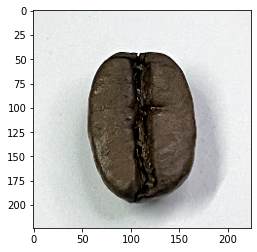

In [21]:
print(y_train[0])
plt.imshow(x_train[0])

0


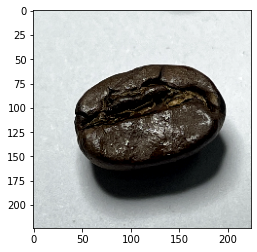

In [22]:
print(y_test[0])
plt.imshow(x_test[0])

In [27]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [30]:
print(x_test.shape)

(400, 224, 224, 3)


In [31]:
y_train_cat = to_categorical(y_train, 4)
y_test_cat = to_categorical(y_test, 4)

In [33]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides=2))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

In [34]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)     

In [35]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [36]:
his = model.fit(x_train, y_train_cat, batch_size = 30, epochs = 5)

Epoch 1/5
40/40 [==============================] - 67s 2s/step - loss: 1.8021 - accuracy: 0.5392
Epoch 2/5
40/40 [==============================] - 75s 2s/step - loss: 0.2404 - accuracy: 0.9117
Epoch 3/5
40/40 [==============================] - 80s 2s/step - loss: 0.0727 - accuracy: 0.9733
Epoch 4/5
40/40 [==============================] - 84s 2s/step - loss: 0.0554 - accuracy: 0.9817
Epoch 5/5
40/40 [==============================] - 86s 2s/step - loss: 0.1091 - accuracy: 0.9575


In [37]:
model.evaluate(x_test, y_test_cat)

13/13 [==============================] - 8s 629ms/step - loss: 0.0697 - accuracy: 0.9750


[0.06972301006317139, 0.9750000238418579]

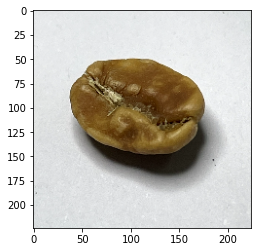

In [59]:
id = 215
plt.imshow(x_test[id])

In [60]:
df.labels.unique()[np.argmax(model.predict(x_test)[id])]

'Light'